# Klasifikasi Citra Penyakit Radang Paru-Paru dan Paru Paru Terindikasi COVID19 Menggunakan Metode CNN 

Link Kaggle : https://www.kaggle.com/prashant268/chest-xray-covid19-pneumonia

# Load Data

In [1]:
! pip install kaggle

In [2]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [00:39<00:00, 68.4MB/s]
100% 2.06G/2.06G [00:39<00:00, 55.5MB/s]


In [4]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/content/chest-xray-covid19-pneumonia.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
print("sudah terekstrak")

sudah terekstrak


In [5]:
# Definisikan path untuk data train dan data validation

base_dir = '/content/Data'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
print('Alhamdulillah berjalan')

Alhamdulillah berjalan


# Preprocessing

In [6]:
print(os.listdir(train_dir))

print(len(os.listdir(train_dir+"/COVID19")))
print(len(os.listdir(train_dir+"/NORMAL")))
print(len(os.listdir(train_dir+"/PNEUMONIA")))

['NORMAL', 'COVID19', 'PNEUMONIA']
460
1266
3418


In [7]:
print(os.listdir(test_dir))

print(len(os.listdir(test_dir+"/COVID19")))
print(len(os.listdir(test_dir+"/NORMAL")))
print(len(os.listdir(test_dir+"/PNEUMONIA")))

['NORMAL', 'COVID19', 'PNEUMONIA']
116
317
855


In [8]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)
print('Sudah berubah')

Sudah berubah


In [9]:
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)
print('sudah berubah')

sudah berubah


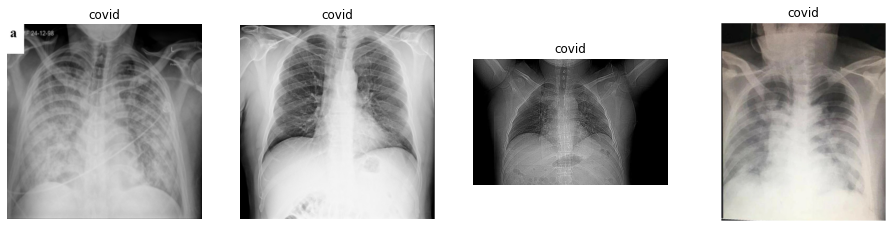

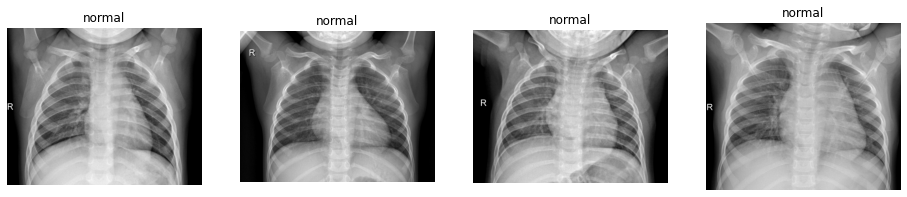

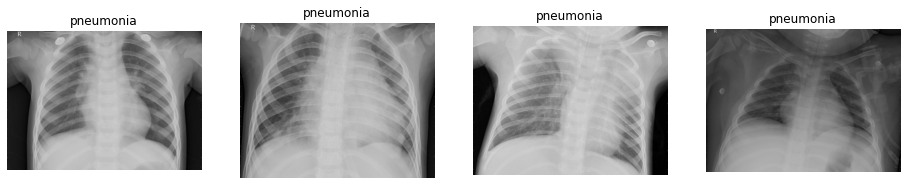

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

file_train_covid = os.path.join("/content/Data/train/COVID19")
file_train_normal = os.path.join("/content/Data/train/NORMAL")
file_train_pneumonia = os.path.join("/content/Data/train/PNEUMONIA")

covid_image = os.listdir(file_train_covid)
normal_image = os.listdir(file_train_normal)
pneumonia_image = os.listdir(file_train_pneumonia)

fname1 = [os.path.join(file_train_covid,fname)
        for fname in covid_image[:4]]

fname2 = [os.path.join(file_train_normal,fname)
        for fname in normal_image[:4]]

fname3 = [os.path.join(file_train_pneumonia,fname)
        for fname in pneumonia_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('covid')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('normal')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('pneumonia')
    plt.imshow(img)
    
plt.show()

In [11]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5144, 150, 150, 3)
Train Label =  (5144,)
Test Data =  (1288, 150, 150, 3)
Test Label =  (1288,)


In [12]:
print("Data sebelum di normalisasi ", train_data[0][0][0])
x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di normalisasi ", x_train[0][0][0])

#untuk mempercepat komputasi, max array 255 -> 0&1 (cakupane lbh sempit)

Data sebelum di normalisasi  [15 15 15]
Data setelah di normalisasi  [0.05882353 0.05882353 0.05882353]


In [13]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di encoder ", train_label[0:8])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test =  lb.fit_transform(test_label)

print("Label setelah di encoder ", y_train[0:8])

Label sebelum di encoder  ['NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL']
Label setelah di encoder  [1 1 1 1 1 1 1 1]


# Modelling

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, GlobalMaxPooling2D,  GlobalAveragePooling2D

In [15]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [16]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [18]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
258/258 [==============================] - 37s 26ms/step - loss: -2725166592.0000 - acc: 0.2459 - val_loss: -19715676160.0000 - val_acc: 0.2461
Epoch 2/15
258/258 [==============================] - 6s 23ms/step - loss: -319773343744.0000 - acc: 0.2461 - val_loss: -1054562779136.0000 - val_acc: 0.2461
Epoch 3/15
258/258 [==============================] - 6s 23ms/step - loss: -4033745256448.0000 - acc: 0.2461 - val_loss: -8904523120640.0000 - val_acc: 0.2461
Epoch 4/15
258/258 [==============================] - 6s 23ms/step - loss: -21009352622080.0000 - acc: 0.2461 - val_loss: -37457072488448.0000 - val_acc: 0.2461
Epoch 5/15
258/258 [==============================] - 6s 23ms/step - loss: -68957197303808.0000 - acc: 0.2461 - val_loss: -107221652340736.0000 - val_acc: 0.2461
Epoch 6/15
258/258 [==============================] - 6s 23ms/step - loss: -173643061526528.0000 - acc: 0.2461 - val_loss: -247981278232576.0000 - val_acc: 0.2461
Epoch 7/15
258/258 [======================

In [20]:
model2 = Sequential()

model2.add(InputLayer(input_shape=[150,150,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(GlobalMaxPooling2D())
model2.add(Flatten())

In [21]:
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [22]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 19, 19, 64)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)               

In [23]:
model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [24]:
H2 = model2.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
258/258 [==============================] - 7s 23ms/step - loss: -5826203.5000 - acc: 0.2459 - val_loss: -43130580.0000 - val_acc: 0.2461
Epoch 2/15
258/258 [==============================] - 5s 21ms/step - loss: -744517824.0000 - acc: 0.2461 - val_loss: -2500171008.0000 - val_acc: 0.2461
Epoch 3/15
258/258 [==============================] - 5s 21ms/step - loss: -10026640384.0000 - acc: 0.2461 - val_loss: -22605901824.0000 - val_acc: 0.2461
Epoch 4/15
258/258 [==============================] - 5s 21ms/step - loss: -53796597760.0000 - acc: 0.2461 - val_loss: -96749486080.0000 - val_acc: 0.2461
Epoch 5/15
258/258 [==============================] - 5s 21ms/step - loss: -182192701440.0000 - acc: 0.2461 - val_loss: -287109611520.0000 - val_acc: 0.2461
Epoch 6/15
258/258 [==============================] - 5s 20ms/step - loss: -468954611712.0000 - acc: 0.2461 - val_loss: -674073542656.0000 - val_acc: 0.2461
Epoch 7/15
258/258 [==============================] - 5s 21ms/step - loss: -

In [25]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [26]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.6.0


In [27]:
# Create and train a new model instance.
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('model1.h5')

In [28]:
model2.save('model2.h5')